In [1]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

### Using distance: KNN implementation

In [6]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.96


Do we see a change in performance with using the distance weight?

In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.993333333333


### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive; note that the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [8]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?
k = range(2, 100)
params = {'n_neighbors': k }
kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)
gs.grid_scores_

[mean: 0.90667, std: 0.09752, params: {'n_neighbors': 2},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 3},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 4},
 mean: 0.91333, std: 0.08327, params: {'n_neighbors': 5},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 6},
 mean: 0.92000, std: 0.08589, params: {'n_neighbors': 7},
 mean: 0.91333, std: 0.08844, params: {'n_neighbors': 8},
 mean: 0.92000, std: 0.09092, params: {'n_neighbors': 9},
 mean: 0.92000, std: 0.09092, params: {'n_neighbors': 10},
 mean: 0.91333, std: 0.08589, params: {'n_neighbors': 11},
 mean: 0.89333, std: 0.10625, params: {'n_neighbors': 12},
 mean: 0.90667, std: 0.08273, params: {'n_neighbors': 13},
 mean: 0.90000, std: 0.09428, params: {'n_neighbors': 14},
 mean: 0.90000, std: 0.09428, params: {'n_neighbors': 15},
 mean: 0.88667, std: 0.11851, params: {'n_neighbors': 16},
 mean: 0.88000, std: 0.12754, params: {'n_neighbors': 17},
 mean: 0.86667, std: 0.12111, params: {'n_neighbors': 18},
 mean

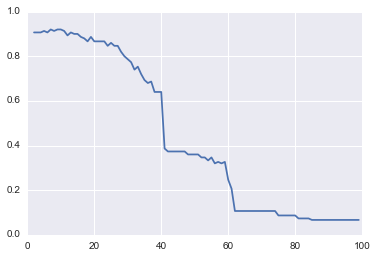

In [9]:
plt.plot(k,[s[1] for s in  gs.grid_scores_],)

Zoom in to look at fit before first dive around 25:

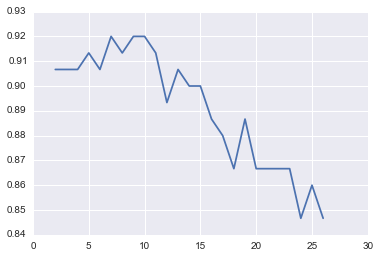

In [10]:
plt.plot(k[:25],[s[1] for s in  gs.grid_scores_][:25],)